<a href="https://colab.research.google.com/github/rayxtn/amazon_review_classification/blob/main/amazon_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import nltk
from nltk import corpus, tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer , PorterStemmer , porter
import re
import sklearn
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from google.colab import drive
drive.mount('/content/drive')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sen_analayzer = SentimentIntensityAnalyzer()

In [34]:
test_text =  "this is a nice !"
sen_analayzer.polarity_scores(test_text)

{'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.4753}

In [35]:
test_text2 = "this is too bad ! "
sen_analayzer.polarity_scores(test_text2)

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5848}

Importing 10% of the data set

In [36]:
amazon_review = pd.read_csv('/content/drive/MyDrive/csv/Amazon_reviews.csv')

# Select the first less than 10% of the rows
product = amazon_review.head(int(0.10 * len(amazon_review)))
# Display the first few rows of the subset
product.head()
# Check the shape of the subset
product.shape

(56845, 10)

In [37]:
print("Original DataFrame:")
product.head()
product.shape
# cleaning data since there is some errors of missing values and non numerical values in scores

Original DataFrame:


(56845, 10)

cleaning the data set

In [54]:
# Drop columns with any missing values
#df_cleaned = product.dropna(axis=1, how='any')
# Remove duplicate rows
df_cleaned = product.drop_duplicates()
# Convert non-numeric values in 'Score' to NaN and then fill missing values with the mean
df_cleaned['Score'] = pd.to_numeric(df_cleaned['Score'], errors='coerce')  # Convert to numeric, invalid parsing becomes NaN
df_cleaned['Score'] = df_cleaned['Score'].fillna(df_cleaned['Score'].mean())  # Fill NaN values with the mean
df_cleaned = df_cleaned.dropna(subset=['ProfileName'])
df_cleaned = df_cleaned.dropna(subset=['Summary'])

print("\nDataFrame after cleaning (removed columns with missing data):")
df_cleaned.head()
df_cleaned.shape


DataFrame after cleaning (removed columns with missing data):


(56838, 10)

In [55]:
# due to this anything less than 3 would be a negative review , just for testing and comparing
df_cleaned['Score'].value_counts().to_frame().T

Score,5,4,1,3,2
count,35521,8165,5468,4510,3174


In [56]:
#applying the nltk sentiment analsis to the first review test
sen_analayzer.polarity_scores(df_cleaned.loc[0]['Summary'])

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

Result compoud seems > than 0 it means positive
going to check the score and compare :

In [57]:
print(df_cleaned.loc[0]['Score'])

5


Result of score included says 5 means it is correct

In [58]:
df_cleaned.isnull().sum().to_frame().T

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0,0,0,0,0,0,0,0,0


In [59]:
df_cleaned['scores_analysis'] = df_cleaned['Score'].apply(lambda x: 'positive' if x > 3 else 'negative')
df_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_analysis
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


In [44]:
df_cleaned.shape

(56838, 11)

# **Creating a new variable in the data frame to check the text analysis and the results**

In [60]:
df_cleaned['mysentiment_scores'] = df_cleaned['Summary'].apply(lambda x: sen_analayzer.polarity_scores(x))
df_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_analysis,mysentiment_scores
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."


In [61]:
len(df_cleaned['mysentiment_scores'])

56838

In [62]:
df_cleaned['compound'] = df_cleaned['mysentiment_scores'].apply(lambda x: x['compound'])
df_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_analysis,mysentiment_scores,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249


In [63]:
df_cleaned['compound_score'] = df_cleaned['compound'].apply(lambda x: 'positive' if x > 0 else 'negative')
df_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_analysis,mysentiment_scores,compound,compound_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive


In [64]:
df_cleaned['scores_analysis'].value_counts()

,count
scores_analysis,
positive,43686
negative,13152


# **Evaluation or confusion Matrix**

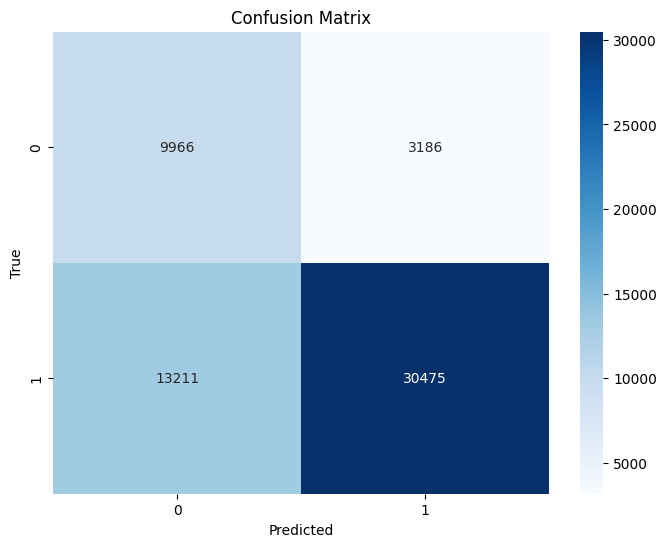

              precision    recall  f1-score   support

    negative       0.43      0.76      0.55     13152
    positive       0.91      0.70      0.79     43686

    accuracy                           0.71     56838
   macro avg       0.67      0.73      0.67     56838
weighted avg       0.80      0.71      0.73     56838

Accuracy: 0.7115134241176677


In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_true = df_cleaned['scores_analysis']
y_pred = df_cleaned['compound_score']
cm = confusion_matrix(y_true, y_pred)
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))

scores_analysis
positive    43686
negative    13152
Name: count, dtype: int64


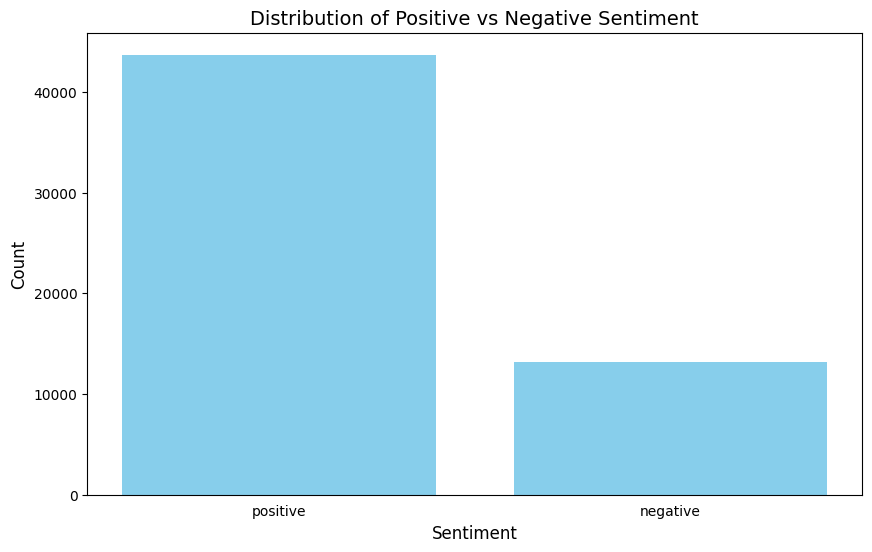

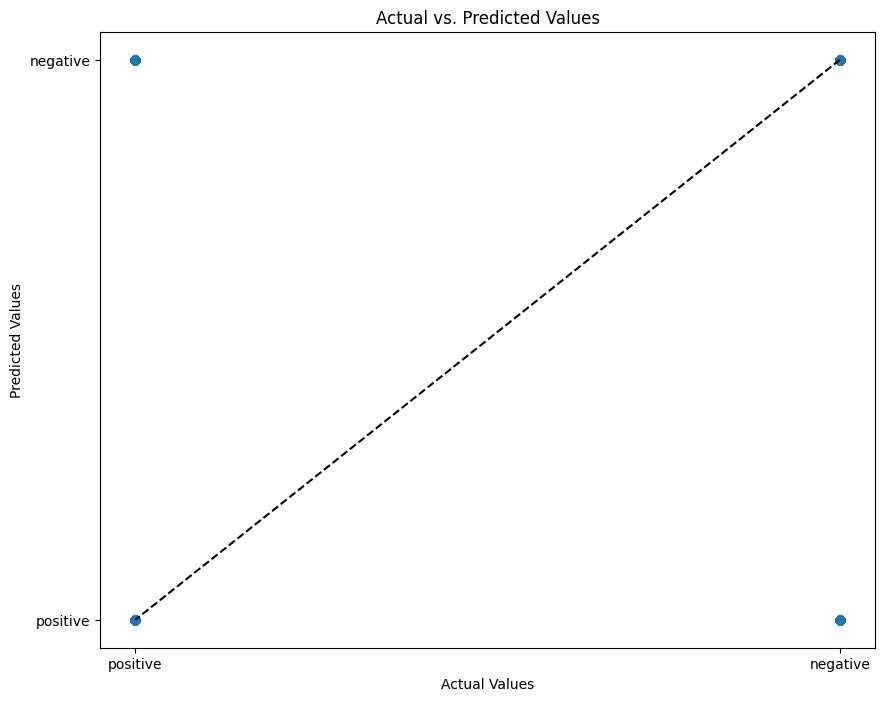

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df_cleaned['scores_analysis'].value_counts())  # Check the counts of positive and negative

# Count the occurrences of 'positive' and 'negative' sentiments
sentiment_counts = df_cleaned['scores_analysis'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')  # Set a specific color

plt.title('Distribution of Positive vs Negative Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tick_params(bottom=False)  # Remove bottom ticks
plt.show()


# Just Creating some balance for better **results**

In [86]:
from sklearn.utils import resample

positive_reviews = df_cleaned[df_cleaned['scores_analysis'] == 'positive']
negative_reviews = df_cleaned[df_cleaned['scores_analysis'] == 'negative']

# Undersample the positive reviews
positive_downsampled = resample(
    positive_reviews,
    replace=False,  # nooo duplicatiooon
    n_samples=len(negative_reviews),  # match the exact number of negative revviews
    random_state=42
)

# combining the downsampled positive and all negative reviews
balanced_reviews_undersample = pd.concat([positive_downsampled, negative_reviews])

# shuffling the dataset
balanced_reviews_undersample = balanced_reviews_undersample.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_reviews_undersample['scores_analysis'].value_counts())


scores_analysis
positive    13152
negative    13152
Name: count, dtype: int64


Balance created for positive and negative reviews



# Building a machine learning approche

# **Preprocessing **

In [87]:
df_cleaned.shape

(56838, 14)

Cleaning the Summary texts and removing the stop words

In [92]:
from tqdm import tqdm

preprocessed_reviews = []
for review in tqdm(df_cleaned['Summary']):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    preprocessed_reviews.append(review)
#


100%|██████████| 56838/56838 [00:36<00:00, 1537.16it/s]


# Testing the difference after processing the **column**

In [97]:
print(df_cleaned['Summary'][2])

"Delight" says it all


In [98]:
print(preprocessed_reviews[2])

delight says


# ***Feature Extraction***

*Using TF-IDF*

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_reviews).toarray()
pd.DataFrame(X).shape


(5684, 3216)

In [29]:
df_cleaned['scores_analysis'] = df_cleaned['scores_analysis'].astype('category')
df_cleaned['scores_analysis'] = df_cleaned['scores_analysis'].cat.codes

In [30]:
df_cleaned['scores_analysis'].value_counts()

,count
scores_analysis,
1,4832
0,852


# **Split the data into train and test now**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned['scores_analysis'], test_size=0.25, random_state=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [38]:
print(accuracy_score(y_train, y_pred_train))
print('****************************************')
print(accuracy_score(y_test, y_pred_test))

0.9870982875908985
****************************************
0.9809992962702322


**Testing Random forest with the balanced DATA**

In [107]:
df_cleaned = balanced_reviews_undersample

In [108]:
df_cleaned['scores_analysis'].value_counts()

,count
scores_analysis,
positive,13152
negative,13152


In [109]:
from tqdm import tqdm

preprocessed_reviews = []
for review in tqdm(df_cleaned['Summary']):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    preprocessed_reviews.append(review)

100%|██████████| 26304/26304 [00:23<00:00, 1102.14it/s]


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_reviews).toarray()
pd.DataFrame(X).shape

(26304, 7807)

In [111]:
df_cleaned['scores_analysis'] = df_cleaned['scores_analysis'].astype('category')
df_cleaned['scores_analysis'] = df_cleaned['scores_analysis'].cat.codes

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned['scores_analysis'], test_size=0.25, random_state=1)

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

0.9684712084347121


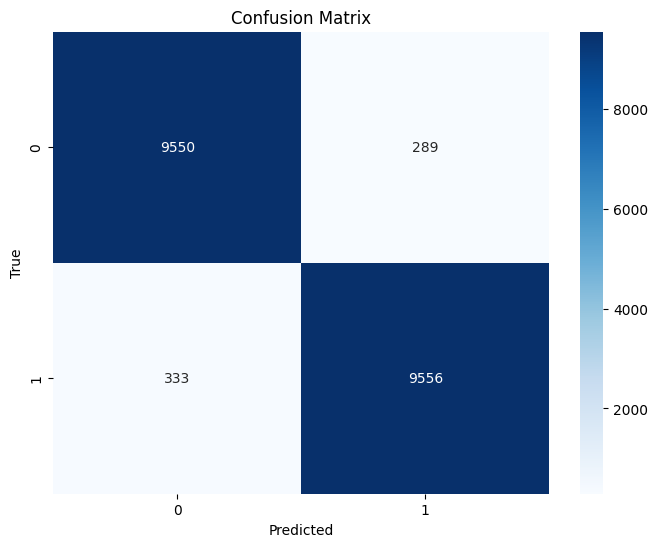

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9839
           1       0.97      0.97      0.97      9889

    accuracy                           0.97     19728
   macro avg       0.97      0.97      0.97     19728
weighted avg       0.97      0.97      0.97     19728

Accuracy: 0.9684712084347121
****************************************
Accuracy test: 0.798205596107056


In [120]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print(accuracy_score(y_train, y_pred_train))

cm = confusion_matrix(y_train, y_pred_train)
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print('****************************************')
print("Accuracy test:",accuracy_score(y_test, y_pred_test))


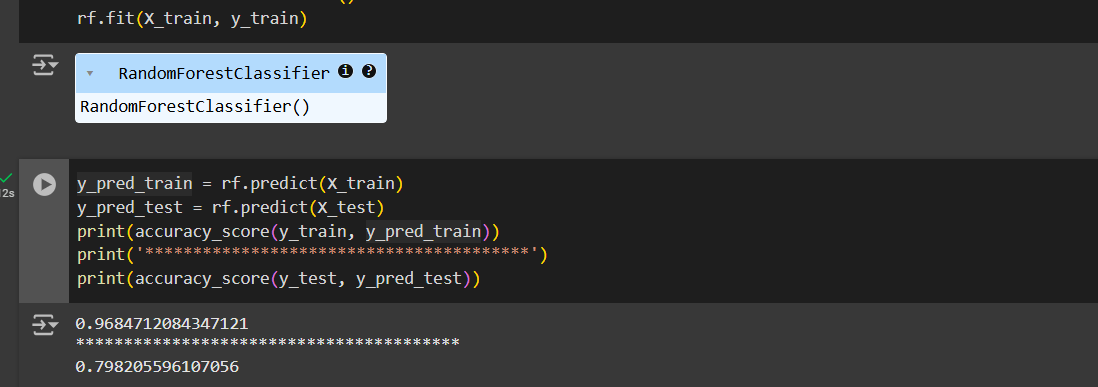

**using cross validation methode on the model**

In [115]:
from sklearn.model_selection import cross_val_score

test_accuracy = cross_val_score(rf, X_train, y_train, cv=5)
mean_accuracy = np.mean(test_accuracy)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.7811741270137991


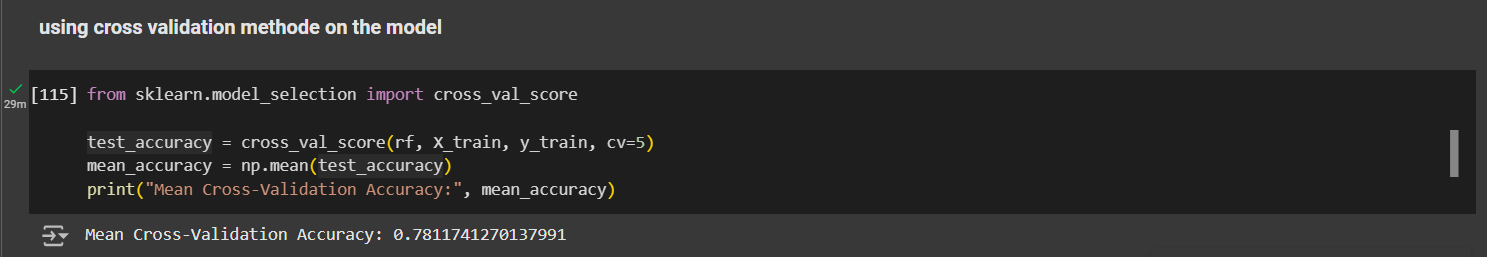

Why Is This Improvement Happening?


1.  More Data = Better Generalization
2.  More Balanced Data Exposure
3.  Reduced Overfitting








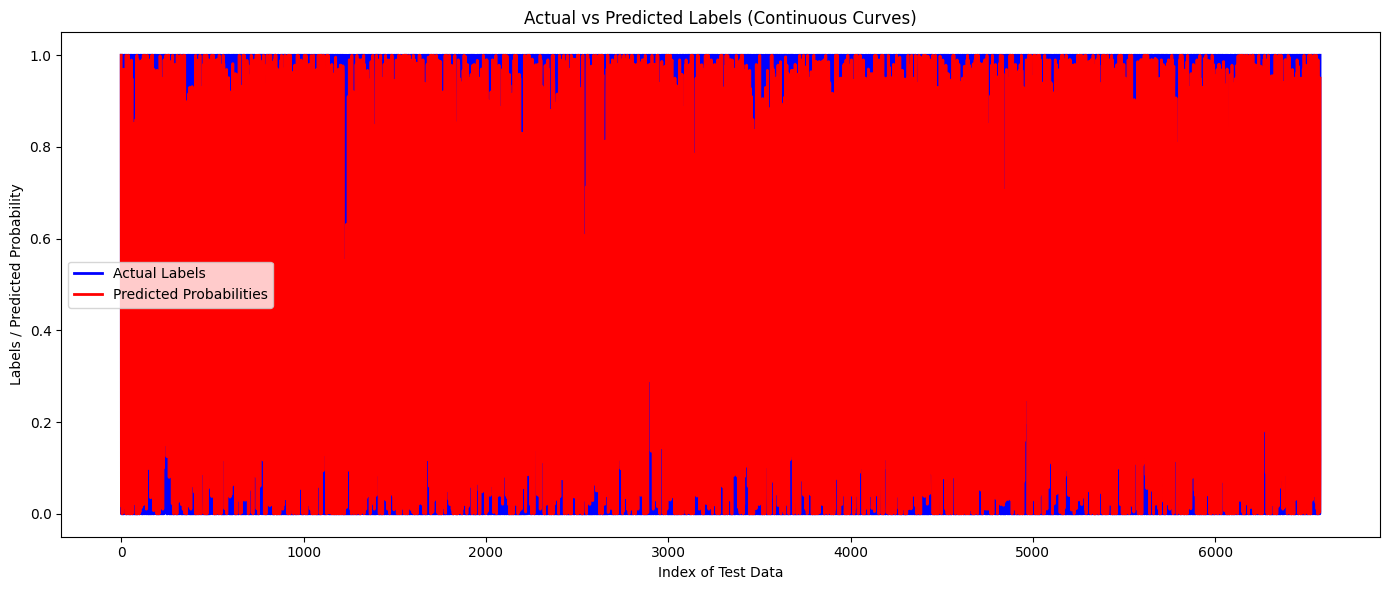

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

y_pred_test = rf.predict(X_test)
# Get predicted probabilities for the positive class (class 1) for the test set
y_pred_prob_test = rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1
x = np.arange(len(y_test))
#creting a smooth curve
spl_actual = make_interp_spline(x, y_test.values, k=3)
smooth_actual = spl_actual(x)

# Interpolation for predicted labels (to create a smooth curve)
spl_pred = make_interp_spline(x, y_pred_prob_test, k=3)
smooth_pred = spl_pred(x)

plt.figure(figsize=(14, 6))
plt.plot(x, smooth_actual, label='Actual Labels', color='blue', lw=2)

plt.plot(x, smooth_pred, label='Predicted Probabilities', color='red', lw=2)

plt.title('Actual vs Predicted Labels (Continuous Curves)')
plt.xlabel('Index of Test Data')
plt.ylabel('Labels / Predicted Probability')
plt.legend()
plt.tight_layout()
plt.show()



**Using Naive Bayes method**

In [105]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
# Create a Naive Bayes classifier
model = MultinomialNB()
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.39      0.52      3355
           1       0.84      0.97      0.90     10855

    accuracy                           0.83     14210
   macro avg       0.83      0.68      0.71     14210
weighted avg       0.83      0.83      0.81     14210

Accuracy: 0.8344827586206897


**===>> As Expected naise bayes would perform faster but less precise than random forest**